In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
df = pd.read_csv("world_data_full_apply.csv", index_col = 0)
df.head(2)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


# Ejercicios

El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

Instrucciones:

1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [3]:
colum_nulos = df.isnull().sum() 
colum_nulos

country                                   0
density                                   0
abbreviation                              7
agricultural_land                         7
land_area                                30
armed_forces_size                        29
birth_rate                                6
calling_code                              1
capital/major_city                        3
co2-emissions                            12
cpi                                      20
cpi_change                               16
currency-code                            15
fertility_rate                            7
forested_area                             7
gasoline_price                           20
gdp                                       2
gross_primary_education_enrollment        7
gross_tertiary_education_enrollment      12
infant_mortality                          6
largest_city                              6
life_expectancy                           8
maternal_mortality_ratio        

In [4]:
df_nulos = pd.DataFrame(colum_nulos, columns = ["cantidad_nulos"])

df_nulos[df_nulos["cantidad_nulos"] > 0]

,cantidad_nulos
abbreviation,7
agricultural_land,7
land_area,30
armed_forces_size,29
birth_rate,6
calling_code,1
capital/major_city,3
co2-emissions,12
cpi,20
cpi_change,16


In [5]:
df.shape

(195, 36)

2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

In [6]:
# Obtenemos la lista de columnas categóricas que tienen nulos
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [7]:
for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna ABBREVIATION


abbreviation
AF    0.005128
AL    0.005128
DZ    0.005128
AD    0.005128
AO    0.005128
        ...   
VE    0.005128
VN    0.005128
YE    0.005128
ZM    0.005128
ZW    0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJOR_CITY


capital/major_city
Kabul               0.005128
Tirana              0.005128
Algiers             0.005128
Andorra la Vella    0.005128
Luanda              0.005128
                      ...   
Caracas             0.005128
Hanoi               0.005128
Sanaa               0.005128
Lusaka              0.005128
Harare              0.005128
Name: count, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


currency-code
EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
VUV    0.005128
VED    0.005128
VND    0.005128
YER    0.005128
ZMW    0.005128
Name: count, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGEST_CITY


largest_city
S����               0.010256
Kabul               0.005128
Algiers             0.005128
Tirana              0.005128
Luanda              0.005128
                      ...   
Caracas             0.005128
Ho Chi Minh City    0.005128
Sanaa               0.005128
Lusaka              0.005128
Harare              0.005128
Name: count, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIAL_LANGUAGE


official_language
English              0.158974
French               0.128205
Spanish              0.097436
Arabic               0.092308
Portuguese           0.035897
                       ...   
Tuvaluan Language    0.005128
Ukrainian            0.005128
Uzbek                0.005128
Vietnamese           0.005128
Shona                0.005128
Name: count, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna CONTINENT


continent
Africa             0.271795
Europe             0.241026
Asia               0.230769
Central America    0.102564
Oceania            0.071795
South America      0.066667
North America      0.010256
Name: count, dtype: float64

........................


In [8]:
columnas_moda = ["currency-code", "largest_city"]
columnas_desconocido = ["abbreviation", "capital/major_city", "official_language", "continent"]

In [9]:
for columna in columnas_moda:
    
    # calculamos la moda para la columna por la que estamos iterando
    moda = df[columna].mode()[0]    
    
    # utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
    df[columna] = df[columna].fillna(moda)

# por último chequeamos si se han eliminado los nulos en las columnas de "marital" y "loan"
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

df[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


currency-code    0
largest_city     0
dtype: int64

In [10]:
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation          0
capital/major_city    0
official_language     0
continent             0
dtype: int64

In [11]:
df.sample(8)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
115,Montenegro,47.0,ME,19.0,13.812,12.0,11.73,382.0,Podgorica,2.017,116.32,2.6,EUR,1.75,61.5,1.16,5.494737e+09,100.0,56.1,2.3,Podgorica,76.8,6.0,1.23,Montenegrin language,31.8,2.76,622.137,54.4,NaN,22.2,14.88,417.765,42.708678,19.374390,Europe
111,Federated States of Micronesia,784.0,FM,31.4,702.000,NaN,22.82,691.0,Palikir,143.000,112.10,0.5,USD,3.05,91.9,NaN,4.019323e+08,97.2,14.1,25.6,Palikir,67.8,88.0,NaN,English,2.5,0.18,113.815,NaN,25.2,60.5,NaN,25.963,7.425554,150.550812,Oceania
142,Romania,84.0,RO,58.8,238.391,126.0,9.60,40.0,Bucharest,69.259,123.78,3.8,RON,1.71,30.1,1.16,2.500774e+11,85.2,49.4,6.1,Bucharest,75.4,19.0,2.25,Romanian,21.3,2.98,NaN,54.7,14.6,20.0,3.98,NaN,45.943161,24.966760,Europe
9,Austria,109.0,AT,32.4,83.871,21.0,9.70,43.0,Vienna,61.448,118.06,1.5,EUR,1.47,46.9,1.20,4.463147e+11,103.1,85.1,2.9,Vienna,81.6,5.0,NaN,German,17.9,5.17,NaN,60.7,25.4,51.4,4.67,NaN,47.516231,14.550072,Europe
183,Ukraine,75.0,UA,71.7,603.550,297.0,8.70,380.0,Kyiv,202.250,281.66,7.9,UAH,1.30,16.7,0.83,1.537811e+11,99.0,82.7,7.5,Kyiv,71.6,19.0,0.84,Ukrainian,47.8,2.99,NaN,54.2,20.1,45.2,8.88,NaN,48.379433,31.165580,Europe
188,Uzbekistan,79.0,UZ,62.9,447.400,68.0,23.30,998.0,Tashkent,91.811,NaN,NaN,UZS,2.42,7.5,1.03,5.792129e+10,104.2,10.1,19.1,Tashkent,71.6,29.0,0.24,Uzbek,42.7,2.37,NaN,65.1,14.8,31.6,5.92,NaN,41.377491,64.585262,Asia
161,South Africa,49.0,ZA,79.8,NaN,80.0,20.51,27.0,Pretoria,476.644,158.93,4.1,ZAR,2.41,7.6,0.92,3.514316e+11,100.9,22.4,28.5,Johannesburg,63.9,119.0,NaN,Afrikaans,7.7,0.91,NaN,56.0,27.5,29.2,28.18,NaN,-30.559482,22.937506,Africa
5,Antigua and Barbuda,223.0,AG,20.5,443.000,0.0,15.33,1.0,"St. John's, Saint John",557.000,113.81,1.2,XCD,1.99,22.3,0.99,1.727759e+09,105.0,24.8,5.0,"St. John's, Saint John",76.9,42.0,3.04,English,24.3,2.76,97.118,NaN,16.5,43.0,NaN,23.800,17.060816,-61.796428,Central America


3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

In [12]:
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')


In [13]:
for col in nulos_esta_num:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

La distribución de las categorías para la columna AGRICULTURAL_LAND


agricultural_land
17.4    0.015385
43.1    0.010256
2.7     0.010256
33.3    0.010256
44.6    0.010256
          ...   
62.9    0.005128
15.3    0.005128
24.5    0.005128
32.1    0.005128
41.9    0.005128
Name: count, Length: 168, dtype: float64

........................
La distribución de las categorías para la columna LAND_AREA


land_area
652.230    0.005128
28.748     0.005128
468.000    0.005128
443.000    0.005128
29.743     0.005128
             ...   
912.050    0.005128
331.210    0.005128
527.968    0.005128
752.618    0.005128
390.757    0.005128
Name: count, Length: 165, dtype: float64

........................
La distribución de las categorías para la columna ARMED_FORCES_SIZE


armed_forces_size
2.0      0.035897
1.0      0.030769
9.0      0.025641
0.0      0.025641
16.0     0.025641
           ...   
148.0    0.005128
68.0     0.005128
343.0    0.005128
522.0    0.005128
51.0     0.005128
Name: count, Length: 100, dtype: float64

........................
La distribución de las categorías para la columna BIRTH_RATE


birth_rate
10.00    0.015385
12.00    0.015385
13.99    0.010256
10.30    0.010256
10.10    0.010256
           ...   
29.60    0.005128
17.88    0.005128
30.45    0.005128
36.19    0.005128
30.68    0.005128
Name: count, Length: 170, dtype: float64

........................
La distribución de las categorías para la columna CALLING_CODE


calling_code
1.0      0.061538
7.0      0.010256
355.0    0.005128
213.0    0.005128
376.0    0.005128
           ...   
58.0     0.005128
84.0     0.005128
967.0    0.005128
260.0    0.005128
263.0    0.005128
Name: count, Length: 182, dtype: float64

........................
La distribución de las categorías para la columna CO2-EMISSIONS


co2-emissions
495.000    0.010256
28.284     0.010256
143.000    0.010256
2.017      0.010256
34.693     0.005128
             ...   
164.175    0.005128
192.668    0.005128
10.609     0.005128
5.141      0.005128
10.983     0.005128
Name: count, Length: 179, dtype: float64

........................
La distribución de las categorías para la columna CPI


cpi
106.58    0.010256
99.55     0.010256
110.62    0.010256
149.90    0.005128
113.81    0.005128
            ...   
117.13    0.005128
163.52    0.005128
157.58    0.005128
212.31    0.005128
105.51    0.005128
Name: count, Length: 172, dtype: float64

........................
La distribución de las categorías para la columna CPI_CHANGE


cpi_change
 1.8      0.035897
 2.8      0.035897
 2.6      0.030769
 1.6      0.025641
 2.3      0.025641
            ...   
 15.2     0.005128
-1.9      0.005128
 7.5      0.005128
 254.9    0.005128
 8.1      0.005128
Name: count, Length: 86, dtype: float64

........................
La distribución de las categorías para la columna FERTILITY_RATE


fertility_rate
1.73    0.025641
1.62    0.020513
1.75    0.020513
4.32    0.015385
1.26    0.015385
          ...   
1.97    0.005128
3.78    0.005128
2.05    0.005128
3.79    0.005128
3.62    0.005128
Name: count, Length: 139, dtype: float64

........................
La distribución de las categorías para la columna FORESTED_AREA


forested_area
32.7    0.015385
0.0     0.015385
33.2    0.015385
43.1    0.015385
12.6    0.015385
          ...   
36.1    0.005128
48.1    0.005128
1.0     0.005128
65.2    0.005128
35.5    0.005128
Name: count, Length: 161, dtype: float64

........................
La distribución de las categorías para la columna GASOLINE_PRICE


gasoline_price
0.71    0.030769
0.92    0.025641
1.16    0.025641
0.98    0.020513
1.12    0.020513
          ...   
1.46    0.005128
1.50    0.005128
1.31    0.005128
0.00    0.005128
1.34    0.005128
Name: count, Length: 101, dtype: float64

........................
La distribución de las categorías para la columna GDP


gdp
1.910135e+10    0.005128
1.527808e+10    0.005128
1.699882e+11    0.005128
3.154058e+09    0.005128
9.463542e+10    0.005128
                  ...   
4.823593e+11    0.005128
2.619212e+11    0.005128
2.691440e+10    0.005128
2.306472e+10    0.005128
2.144076e+10    0.005128
Name: count, Length: 193, dtype: float64

........................
La distribución de las categorías para la columna GROSS_PRIMARY_EDUCATION_ENROLLMENT


gross_primary_education_enrollment
104.0    0.020513
100.9    0.020513
106.4    0.015385
99.4     0.015385
100.3    0.015385
           ...   
101.2    0.005128
101.8    0.005128
109.3    0.005128
110.6    0.005128
93.6     0.005128
Name: count, Length: 141, dtype: float64

........................
La distribución de las categorías para la columna GROSS_TERTIARY_EDUCATION_ENROLLMENT


gross_tertiary_education_enrollment
10.2    0.015385
12.8    0.010256
9.3     0.010256
82.0    0.010256
63.9    0.010256
          ...   
4.7     0.005128
79.3    0.005128
28.5    0.005128
4.1     0.005128
10.0    0.005128
Name: count, Length: 171, dtype: float64

........................
La distribución de las categorías para la columna INFANT_MORTALITY


infant_mortality
6.1     0.020513
3.1     0.020513
3.6     0.020513
2.7     0.015385
3.3     0.015385
          ...   
21.4    0.005128
16.5    0.005128
42.9    0.005128
40.4    0.005128
33.9    0.005128
Name: count, Length: 144, dtype: float64

........................
La distribución de las categorías para la columna LIFE_EXPECTANCY


life_expectancy
76.5    0.025641
61.2    0.020513
76.8    0.015385
72.8    0.015385
75.7    0.015385
          ...   
63.0    0.005128
70.3    0.005128
75.3    0.005128
66.1    0.005128
63.5    0.005128
Name: count, Length: 134, dtype: float64

........................
La distribución de las categorías para la columna MATERNAL_MORTALITY_RATIO


maternal_mortality_ratio
5.0      0.041026
19.0     0.030769
8.0      0.025641
3.0      0.025641
17.0     0.025641
           ...   
375.0    0.005128
125.0    0.005128
164.0    0.005128
213.0    0.005128
458.0    0.005128
Name: count, Length: 114, dtype: float64

........................
La distribución de las categorías para la columna MINIMUM_WAGE


minimum_wage
2.00    0.015385
0.41    0.015385
1.49    0.010256
0.71    0.010256
0.47    0.010256
          ...   
0.84    0.005128
7.25    0.005128
1.66    0.005128
1.56    0.005128
0.73    0.005128
Name: count, Length: 114, dtype: float64

........................
La distribución de las categorías para la columna OUT_OF_POCKET_HEALTH_EXPENDITURE


out_of_pocket_health_expenditure
40.5    0.015385
15.2    0.015385
36.7    0.015385
36.4    0.010256
25.1    0.010256
          ...   
45.8    0.005128
43.5    0.005128
81.0    0.005128
27.5    0.005128
25.8    0.005128
Name: count, Length: 160, dtype: float64

........................
La distribución de las categorías para la columna PHYSICIANS_PER_THOUSAND


physicians_per_thousand
0.08    0.030769
0.04    0.020513
0.07    0.020513
0.42    0.015385
2.61    0.015385
          ...   
5.05    0.005128
2.37    0.005128
1.92    0.005128
0.82    0.005128
1.19    0.005128
Name: count, Length: 152, dtype: float64

........................
La distribución de las categorías para la columna POPULATION


population
77.142     0.005128
97.118     0.005128
389.482    0.005128
287.025    0.005128
390.353    0.005128
727.145    0.005128
433.285    0.005128
483.628    0.005128
850.886    0.005128
973.560    0.005128
71.808     0.005128
889.953    0.005128
112.003    0.005128
782.766    0.005128
836.000    0.005128
361.313    0.005128
117.606    0.005128
38.019     0.005128
645.397    0.005128
530.953    0.005128
502.653    0.005128
58.791     0.005128
113.815    0.005128
38.964     0.005128
622.137    0.005128
10.084     0.005128
18.233     0.005128
52.823     0.005128
182.790    0.005128
100.455    0.005128
202.506    0.005128
33.860     0.005128
215.056    0.005128
97.625     0.005128
669.823    0.005128
581.372    0.005128
100.209    0.005128
11.646     0.005128
299.882    0.005128
Name: count, dtype: float64

........................
La distribución de las categorías para la columna POPULATION_LABOR_FORCE_PARTICIPATION


population_labor_force_participation
65.1    0.015385
68.8    0.015385
72.0    0.015385
74.6    0.010256
60.7    0.010256
          ...   
82.1    0.005128
62.8    0.005128
77.4    0.005128
38.0    0.005128
83.1    0.005128
Name: count, Length: 145, dtype: float64

........................
La distribución de las categorías para la columna TAX_REVENUE


tax_revenue
19.5    0.020513
23.0    0.015385
18.6    0.015385
14.2    0.015385
10.2    0.015385
          ...   
21.1    0.005128
17.9    0.005128
0.1     0.005128
9.6     0.005128
16.2    0.005128
Name: count, Length: 119, dtype: float64

........................
La distribución de las categorías para la columna TOTAL_TAX_RATE


total_tax_rate
36.6    0.020513
49.7    0.015385
83.7    0.010256
49.1    0.010256
41.2    0.010256
          ...   
15.9    0.005128
8.5     0.005128
37.6    0.005128
26.6    0.005128
15.6    0.005128
Name: count, Length: 156, dtype: float64

........................
La distribución de las categorías para la columna UNEMPLOYMENT_RATE


unemployment_rate
4.59     0.015385
4.34     0.010256
5.56     0.010256
3.32     0.010256
5.36     0.010256
           ...   
8.80     0.005128
2.01     0.005128
12.91    0.005128
11.43    0.005128
4.95     0.005128
Name: count, Length: 164, dtype: float64

........................
La distribución de las categorías para la columna URBAN_POPULATION


urban_population
67.873     0.005128
23.800     0.005128
323.784    0.005128
89.431     0.005128
179.039    0.005128
317.538    0.005128
337.711    0.005128
364.029    0.005128
248.152    0.005128
800.708    0.005128
758.549    0.005128
50.830     0.005128
984.812    0.005128
916.024    0.005128
505.048    0.005128
40.765     0.005128
840.922    0.005128
208.912    0.005128
339.110    0.005128
64.489     0.005128
607.508    0.005128
5.464      0.005128
565.488    0.005128
213.645    0.005128
475.902    0.005128
45.514     0.005128
515.980    0.005128
25.963     0.005128
38.964     0.005128
417.765    0.005128
14.491     0.005128
16.269     0.005128
34.280     0.005128
58.185     0.005128
35.588     0.005128
32.969     0.005128
158.277    0.005128
55.762     0.005128
162.164    0.005128
384.258    0.005128
400.182    0.005128
24.145     0.005128
741.944    0.005128
7.362      0.005128
76.152     0.005128
Name: count, dtype: float64

........................
La distribución de las categorías para la columna LATITUDE


latitude
 33.939110    0.005128
 41.153332    0.005128
 28.033886    0.005128
 42.506285    0.005128
-11.202692    0.005128
                ...   
 6.423750     0.005128
 14.058324    0.005128
 15.552727    0.005128
-13.133897    0.005128
-19.015438    0.005128
Name: count, Length: 194, dtype: float64

........................
La distribución de las categorías para la columna LONGITUDE


longitude
 67.709953     0.005128
 20.168331     0.005128
 1.659626      0.005128
 1.521801      0.005128
 17.873887     0.005128
                 ...   
-66.589730     0.005128
 108.277199    0.005128
 48.516388     0.005128
 27.849332     0.005128
 29.154857     0.005128
Name: count, Length: 194, dtype: float64

........................


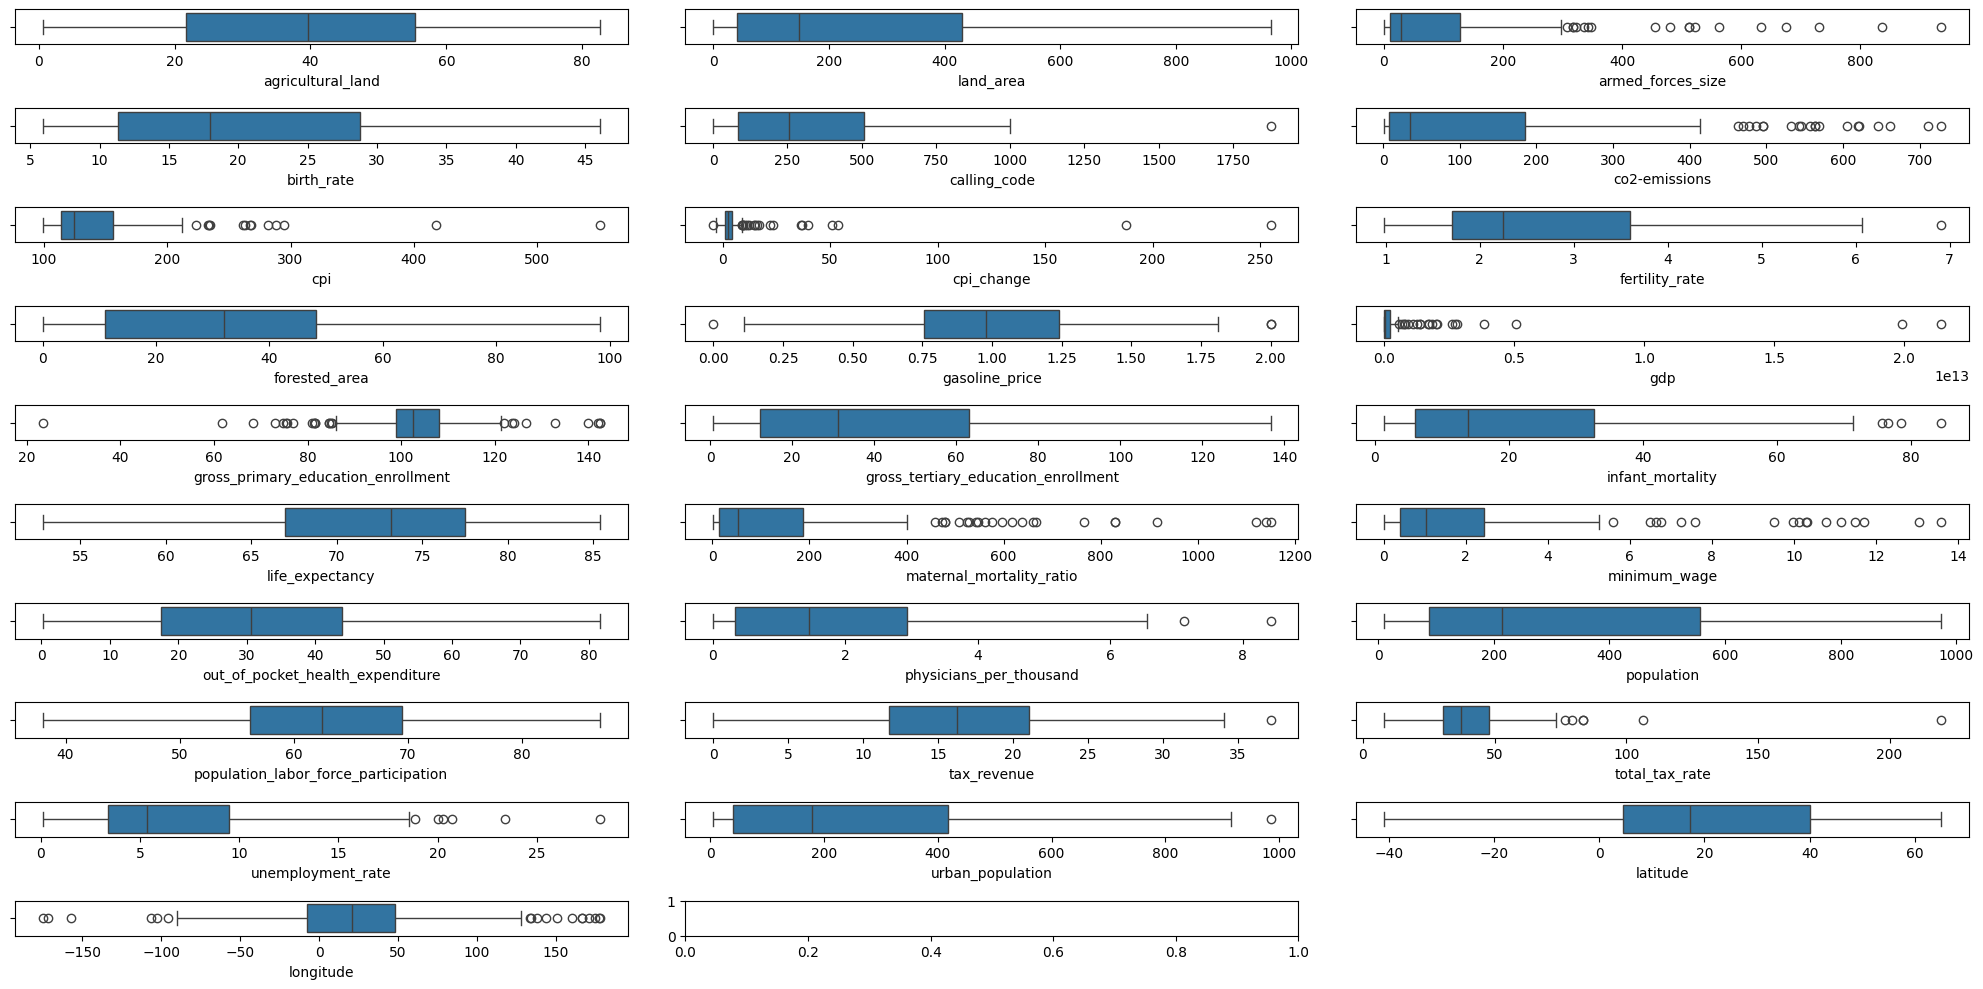

In [14]:
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

¿Cómo identificamos los *outliers* o valores atípicos en las columnas? Son todos aquellos puntos que se ven más allá de los bigotes de las gráficas, por lo tanto, tenemos valores atípicos en las columnas de "armed_forces_size", "co2-emissions", "cpi", "cpi_change", "fertility_rate","gasoline_price", "gdp", "gross_primary_education_enrollment", "infant_mortality", "maternal_mortality_ratio", "minimun_wage", "physicians_per_thousand", "tax_revenue, "total_tax_rate", "unemployment_rate", "urban_population", "longitude". KNNImputer y IterativeImputer

"agricultural_land", "land_area", "birth_rate", "forested_area", "groos_tertiary_education_enrollment", "life_expentacy", "out_of_pocket_health_expendiature", "population", "population_labor_force_participation", "latitude". .fillna() y SimpleImputer`

In [15]:
df_copia = df.copy()
df_copia.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.23,323.0,32.49,93.0,Kabul,8.672,149.9,2.3,AFN,4.47,2.1,0.7,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.93911,67.709953,Asia


In [16]:
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["armed_forces_size", "co2-emissions", "cpi", "cpi_change", "fertility_rate","gasoline_price", "gdp", "gross_primary_education_enrollment", "infant_mortality", "maternal_mortality_ratio", "minimum_wage", "physicians_per_thousand", "tax_revenue", "total_tax_rate", "unemployment_rate", "urban_population", "longitude"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado

array([[3.23000000e+02, 8.67200000e+00, 1.49900000e+02, ...,
        1.11200000e+01, 4.28051029e+02, 6.77099530e+01],
       [9.00000000e+00, 4.53600000e+00, 1.19050000e+02, ...,
        1.23300000e+01, 3.59720588e+02, 2.01683310e+01],
       [3.17000000e+02, 1.50006000e+02, 1.51360000e+02, ...,
        1.17000000e+01, 1.67765630e+03, 1.65962600e+00],
       ...,
       [4.00000000e+01, 1.06090000e+01, 1.57580000e+02, ...,
        1.29100000e+01, 5.86001624e+02, 4.85163880e+01],
       [1.60000000e+01, 5.14100000e+00, 2.12310000e+02, ...,
        1.14300000e+01, 6.10235099e+02, 2.78493320e+01],
       [5.10000000e+01, 1.09830000e+01, 1.05510000e+02, ...,
        4.95000000e+00, 7.21583527e+02, 2.91548570e+01]], shape=(195, 17))

In [17]:
df_copia[["armed_forces_size", "co2-emissions", "cpi", "cpi_change", "fertility_rate","gasoline_price", "gdp", "gross_primary_education_enrollment", "infant_mortality", "maternal_mortality_ratio", "minimum_wage", "physicians_per_thousand", "tax_revenue", "total_tax_rate", "unemployment_rate", "urban_population", "longitude"]] = imputer_iterative_imputado

# comprobamos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[['armed_forces_size', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate', 'gasoline_price', 'gdp', 'gross_primary_education_enrollment', 'infant_mortality', 'maternal_mortality_ratio', 'minimum_wage', 'physicians_per_thousand', 'tax_revenue', 'total_tax_rate', 'unemployment_rate', 'urban_population', 'longitude']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
armed_forces_size                     0
co2-emissions                         0
cpi                                   0
cpi_change                            0
fertility_rate                        0
gasoline_price                        0
gdp                                   0
gross_primary_education_enrollment    0
infant_mortality                      0
maternal_mortality_ratio              0
minimum_wage                          0
physicians_per_thousand               0
tax_revenue                           0
total_tax_rate                        0
unemployment_rate                     0
urban_population                      0
longitude                             0
dtype: int64 nulos


In [18]:
imputer = SimpleImputer(strategy = "median")

# ajustamos y transformamos los datos. 📌 Fijaos como hemos puesto dos corchetes en el nombre de la columna
contact_imputado = imputer.fit_transform(df_copia[['agricultural_land', 'land_area', 'birth_rate', 'forested_area', 'gross_tertiary_education_enrollment', 'life_expectancy', 'out_of_pocket_health_expenditure', 'population', 'population_labor_force_participation', 'latitude']])

# comprobamos que es lo que nos devuelve este método. Nos devuelve un array. 
contact_imputado

array([[ 58.1     , 652.23    ,  32.49    , ..., 215.056   ,  48.9     ,
         33.93911 ],
       [ 43.1     ,  28.748   ,  11.78    , ..., 215.056   ,  55.7     ,
         41.153332],
       [ 17.4     , 148.46    ,  24.28    , ..., 215.056   ,  41.2     ,
         28.033886],
       ...,
       [ 44.6     , 527.968   ,  30.45    , ..., 215.056   ,  38.      ,
         15.552727],
       [ 32.1     , 752.618   ,  36.19    , ..., 215.056   ,  74.6     ,
        -13.133897],
       [ 41.9     , 390.757   ,  30.68    , ..., 215.056   ,  83.1     ,
        -19.015438]], shape=(195, 10))

In [19]:
columnas_a_modificar = ['agricultural_land', 'land_area', 'birth_rate', 'forested_area', 'gross_tertiary_education_enrollment', 'life_expectancy', 'out_of_pocket_health_expenditure', 'population', 'population_labor_force_participation', 'latitude']

for i, columna in enumerate(columnas_a_modificar):
    df_copia[columna] = contact_imputado[:, i]  # Asignar cada columna del array a la columna correspondiente del DataFrame

# Comprobar si hay nulos
print(f"Después del 'SimpleImputer' tenemos {df_copia[columnas_a_modificar].isnull().sum().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


In [20]:
df.describe()

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,195.000000,188.000000,165.000000,166.000000,189.000000,194.000000,183.000000,175.000000,179.000000,188.000000,188.000000,175.000000,1.930000e+02,188.000000,183.000000,189.000000,187.000000,181.000000,150.000000,188.000000,188.000000,39.000000,176.000000,169.000000,183.000000,176.000000,45.000000,194.000000,194.000000
mean,134.504533,39.117553,255.212661,103.783133,20.214974,360.546392,125.915470,144.193600,6.722346,2.698138,32.015426,1.002457,4.772959e+11,102.470213,37.963388,21.332804,72.279679,160.392265,2.194133,32.637234,1.839840,333.542718,62.738068,16.573964,40.822404,6.886364,279.461044,19.092351,20.232434
std,157.306774,21.783052,258.385008,167.158031,9.945774,323.236419,181.794917,54.783998,24.450414,1.282267,23.791331,0.368858,2.172173e+12,13.151607,29.261022,19.548058,7.483661,233.502024,2.970796,19.172697,1.684261,296.467504,10.502907,6.961632,20.557662,5.079216,283.322352,23.961779,66.716110
min,1.265000,0.600000,0.000000,0.000000,5.900000,1.000000,1.016000,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,2.000000,0.010000,0.200000,0.010000,10.084000,38.000000,0.000000,8.000000,0.090000,5.464000,-40.900557,-175.198242
25%,26.168500,21.700000,41.277000,10.250000,11.300000,82.500000,7.600000,113.670000,1.000000,1.705000,11.000000,0.755000,8.454620e+09,98.950000,12.150000,6.000000,67.000000,13.000000,0.402500,17.450000,0.332500,87.130000,56.150000,11.700000,30.600000,3.395000,40.765000,4.544175,-7.941496
50%,83.000000,39.600000,148.460000,28.500000,17.950000,255.500000,34.477000,124.740000,2.300000,2.245000,32.000000,0.980000,3.438723e+10,102.550000,31.200000,14.000000,73.200000,53.000000,1.045000,30.700000,1.460000,215.056000,62.450000,16.300000,37.200000,5.360000,179.039000,17.273849,20.972652
75%,165.500000,55.375000,430.000000,128.250000,28.750000,506.750000,185.030500,155.925000,4.250000,3.597500,48.175000,1.240000,2.340940e+11,108.025000,63.150000,32.700000,77.500000,186.000000,2.447500,43.975000,2.935000,556.162500,69.500000,21.100000,48.000000,9.490000,417.765000,40.124603,48.281523
max,847.000000,82.600000,964.000000,936.000000,46.080000,1876.000000,727.973000,550.930000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,973.560000,86.800000,37.200000,219.600000,28.180000,984.812000,64.963051,178.065032


In [21]:
df_copia.describe()

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
count,195.000000,195.000000,195.000000,195.000000,195.000000,194.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,134.504533,39.134872,238.789174,124.899234,20.145282,360.546392,165.150185,154.143102,6.700822,2.696609,32.014872,1.010912,4.772959e+11,102.483115,37.547179,21.291447,72.317436,156.971141,2.175705,32.567692,1.830953,238.753344,62.710000,16.425588,40.831249,6.897155,5495.431559,19.083026,20.232547
std,157.306774,21.386637,240.686172,237.255249,9.798615,323.236419,370.689661,103.433595,23.445119,1.260156,23.358162,0.352003,2.160948e+12,12.912840,28.388404,19.252957,7.330019,226.400445,2.669945,18.827087,1.658474,139.549224,9.975707,6.719375,19.926297,4.824501,24005.510151,23.900297,66.543939
min,1.265000,0.600000,0.000000,0.000000,5.900000,1.000000,1.016000,99.030000,-4.300000,0.980000,0.000000,0.000000,4.727146e+07,23.400000,0.800000,1.400000,52.800000,-40.159244,-3.670588,0.200000,0.010000,10.084000,38.000000,-1.004828,8.000000,0.090000,5.464000,-40.900557,-175.198242
25%,26.168500,22.650000,53.895500,12.500000,11.450000,82.500000,8.124000,114.470000,1.050000,1.710000,11.450000,0.790000,8.476801e+09,99.350000,12.650000,6.100000,67.450000,13.500000,0.485000,17.700000,0.345000,215.056000,57.250000,11.850000,30.900000,3.590000,403.759030,4.553072,-7.658537
50%,83.000000,39.600000,148.460000,42.000000,17.950000,255.500000,41.155000,129.180000,2.600000,2.270000,32.000000,1.020000,3.814529e+10,102.503680,31.200000,14.600000,73.200000,60.000000,1.480000,30.700000,1.570000,215.056000,62.450000,16.628499,37.900000,5.920000,758.549000,17.273849,20.939444
75%,165.500000,54.850000,340.072500,135.832213,28.445000,506.750000,196.909000,155.925000,5.200000,3.565000,47.450000,1.201089,2.420877e+11,107.550000,61.100000,31.550000,77.250000,184.000000,2.890903,43.750000,2.875000,215.056000,68.300000,20.300000,47.600000,8.840000,2545.530453,40.106102,48.046657
max,847.000000,82.600000,964.000000,1918.035431,46.080000,1876.000000,3416.151918,1140.671000,254.900000,6.910000,98.300000,2.000000,2.142770e+13,142.500000,136.600000,84.500000,85.400000,1150.000000,13.590000,81.600000,8.420000,973.560000,86.800000,37.200000,219.600000,28.180000,238323.561321,64.963051,178.065032


4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

Para la limpieza de datos nulos se realizo lo siguiente:

1. Identificar nulos y cuantificarlos.

2. Obtener lista de columnas categóricas.

3. Identificar los valores que dominan en una fila categorica para reemplazar por la moda.

4. Identificar los valores que no dominan en una fila categorica para reemplazar por "Unknown".

**columnas_moda = ["currency-code", "largest_city"]´
**columnas_desconocido = ["abbreviation", "capital/major_city", "official_language", "continent"]

5. Obtener lista de columnas numericas.

6. Ver si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 
# Para hacer esto lo mejor es usar visualización.

7. Identificar puntos que se ven mas alla de los bigotes de las graficas pora reemplazar los nulos con métodos más avanzados como KNNImputer o IterativeImputer.

["armed_forces_size", "co2-emissions", "cpi", "cpi_change", "fertility_rate","gasoline_price", "gdp", "gross_primary_education_enrollment", "infant_mortality", "maternal_mortality_ratio", "minimun_wage", "physicians_per_thousand", "tax_revenue, "total_tax_rate", "unemployment_rate", "urban_population", "longitude"]

6. Identificar puntos que tienen valores por de bajo del 5-10% para reemplazar por la mediana con métodos más avanzados como SimpleImputer o .fillna().

["agricultural_land", "land_area", "birth_rate", "forested_area", "groos_tertiary_education_enrollment", "life_expentacy", "out_of_pocket_health_expendiature", "population", "population_labor_force_participation", "latitude"]